In [ ]:
pip install matplotlib yfinance beautifulsoup4 requests

In [1]:
# Fetching our database using yfinance

import yfinance as yf
import pandas as pd

# Download historical stock data for Apple (AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2023-01-01', end='2025-01-01')

# Save data to CSV
csv_filename = 'apple_stock_data_combined_years.csv'
data.to_csv(csv_filename)

[*********************100%***********************]  1 of 1 completed


# First step - Data cleaning - Remove the first row
sed -i '1d' apple_stock_data_combined_years.csv

# Second step - ChatGPT helped - Round decimal places
awk 'BEGIN{FS=OFS=","} {for(i=1;i<=NF;i++) if($i ~ /^[0-9.]+$/) $i=sprintf("%.2f", $i)} 1' apple_stock_data_combined_years.csv > database.csv


In [2]:
import pandas as pd

# Path to the CSV file
file_path = 'database.csv'

# Read the CSV file, skipping the intermediate row ("Date,,,,,")
data = pd.read_csv(file_path, skiprows=1)

# Rename the 'Price' column to 'Date'
data.rename(columns={'Price': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Assign clear names to the columns
data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Display the DataFrame to check if the names were set correctly
print(data.head())

# Here you can proceed with visualization using matplotlib or other analysis steps

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = 'cleaned_database.csv'
data.to_csv(cleaned_file_path)

# Confirmation message 
print(f'Cleaned data saved to: {cleaned_file_path}')


             Close    High     Low    Open       Volume
Date                                                   
2023-01-03  123.77  129.54  122.88  128.92  112117500.0
2023-01-04  125.05  127.32  123.78  125.57   89113600.0
2023-01-05  123.72  126.44  123.46  125.81   80962700.0
2023-01-06  128.27  128.93  123.59  124.70   87754700.0
2023-01-09  128.80  132.02  128.54  129.11   70790800.0
Cleaned data saved to: cleaned_database.csv


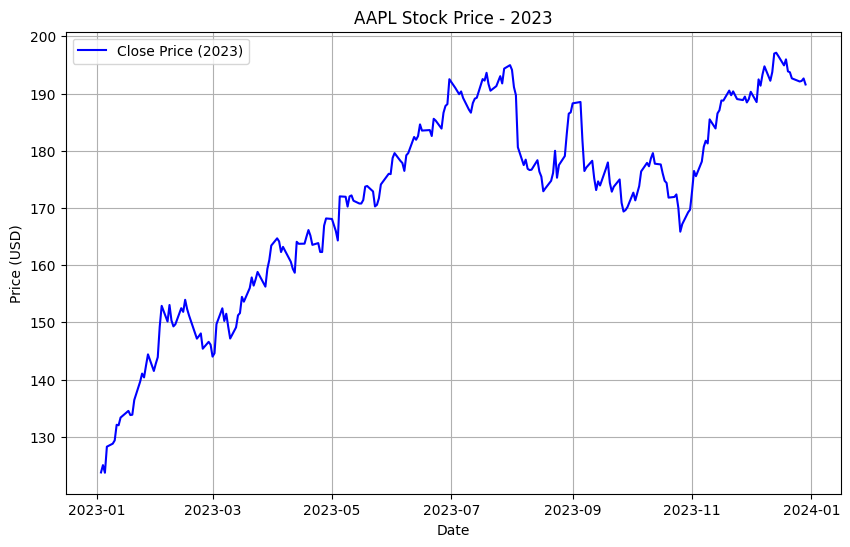

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# GRAPH AAPL STOCK PRICE 2024
# Path to the cleaned CSV file
cleaned_file_path = 'cleaned_database.csv'

# Read the cleaned CSV file
data = pd.read_csv(cleaned_file_path, index_col='Date', parse_dates=True)

# Filter data for 2023
data_2023 = data.loc['2023-01-01':'2023-12-31']

# Plot closing prices for 2023
plt.figure(figsize=(10, 6))
plt.plot(data_2023.index, data_2023['Close'], label='Close Price (2023)', color='blue')

# Formatting
plt.title('AAPL Stock Price - 2023')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


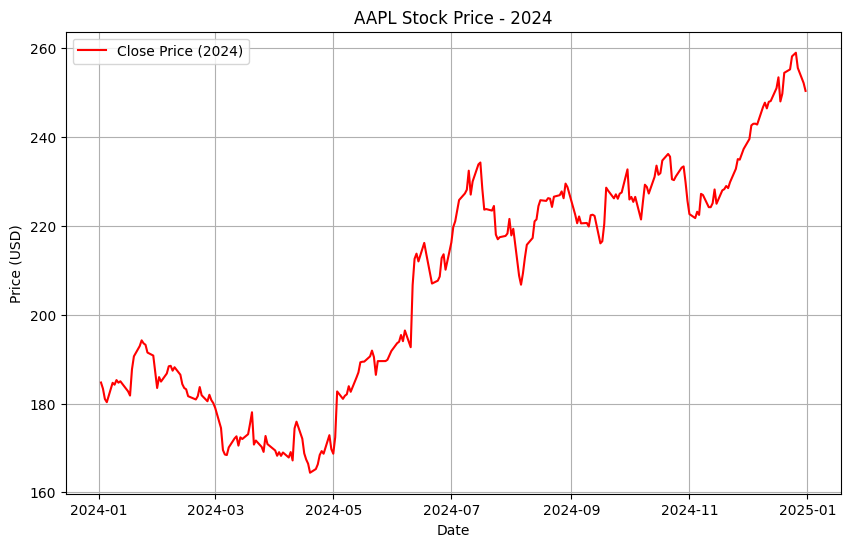

In [4]:
# GRAPH AAPL STOCK PRICE 2024

import pandas as pd
import matplotlib.pyplot as plt

# Filter data for 2024
data_2024 = data.loc['2024-01-01':'2024-12-31']

# Plot closing prices for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['Close'], label='Close Price (2024)', color='red')

# Formatting
plt.title('AAPL Stock Price - 2024')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


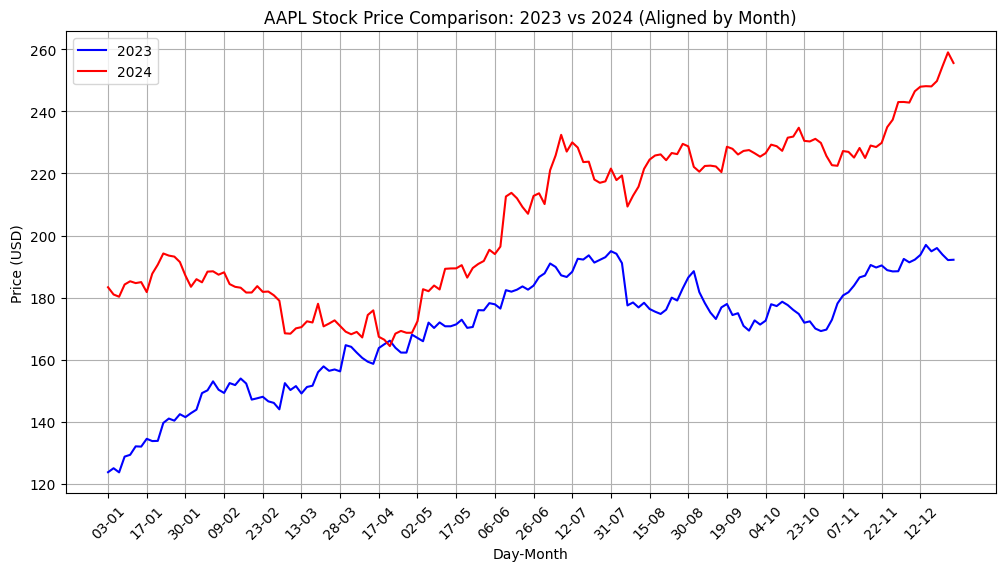

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Process data for 2023 and 2024
data_2023 = data.loc['2023-01-01':'2023-12-31'].copy()
data_2024 = data.loc['2024-01-01':'2024-12-31'].copy()

# Create columns for "Day-Month" (ignoring the year) for alignment
data_2023['Day-Month'] = data_2023.index.strftime('%d-%m')
data_2024['Day-Month'] = data_2024.index.strftime('%d-%m')

# Merge both datasets based on "Day-Month"
comparison_df = pd.merge(data_2023[['Close', 'Day-Month']], 
                         data_2024[['Close', 'Day-Month']], 
                         on='Day-Month', 
                         suffixes=('_2023', '_2024'))

# Plot the comparison of 2023 and 2024 with months properly aligned
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Day-Month'], comparison_df['Close_2023'], label='2023', color='blue')
plt.plot(comparison_df['Day-Month'], comparison_df['Close_2024'], label='2024', color='red')

# Formatting
plt.title('AAPL Stock Price Comparison: 2023 vs 2024 (Aligned by Month)')
plt.xlabel('Day-Month')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Adjust x-axis: Show only the first day of each month
month_ticks = [comparison_df['Day-Month'][i] for i in range(0, len(comparison_df), 7)]
plt.xticks(month_ticks, rotation=45)  # Rotate labels for better readability

# Display the graph
plt.show()


In [6]:
# WEB SCRAPING TO OBTAIN IPHONE RELEASE DATES

import requests
from bs4 import BeautifulSoup
import csv

# Wikipedia page URL with information about iPhones
url = 'https://en.wikipedia.org/wiki/IPhone'

# Make a GET request to the page
response = requests.get(url)

# Parse the page content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the correct section. Assume we are looking for a specific table by class or another identifier
table = soup.find('table', {'class': 'wikitable'})

# List to store data
iphone_data = []

# Iterate over the table rows
for row in table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 1:  # Ensure there is more than one cell
        try:
            # Check if the cell contains dates and adjust as needed
            # Example: Cells may have a different order depending on the table
            product_date = cells[0].get_text(strip=True)
            product_name = cells[1].get_text(strip=True)
            # Check if it's possible to convert the date before adding
            if "iPhone" in product_name:
                iphone_data.append([product_name, product_date])
        except IndexError:
            continue

# Define the name of the CSV file to be created
csv_file_name = 'iphone_launch_dates.csv'

# Save the data to a CSV file
with open(csv_file_name, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Product Name', 'Launch Date'])  # CSV Headers
    writer.writerows(iphone_data)

print(f'Data saved to file {csv_file_name}')


Data saved to file iphone_launch_dates.csv


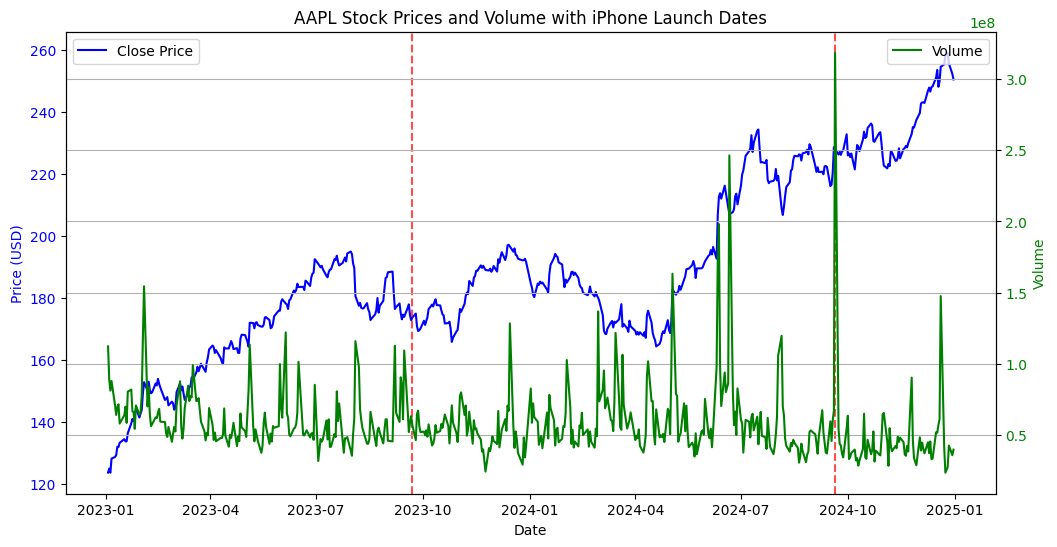

In [7]:
# Stock Price and Volume Chart with iPhone Launch Dates

import pandas as pd
import matplotlib.pyplot as plt

# File paths for CSV files
stock_file_path = 'cleaned_database.csv'
launch_file_path = 'iphone_launch_datas.csv'

# Read stock data CSV file
stock_data = pd.read_csv(stock_file_path, parse_dates=['Date'])
stock_data.set_index('Date', inplace=True)

# Filter the DataFrame to include only data from 2023 onwards
stock_data_2023 = stock_data.loc['2023-01-01':]

# Read iPhone launch data CSV file
launch_data = pd.read_csv(launch_file_path)

# Convert the 'Launch Date' column to datetime format
launch_data['Launch Date'] = pd.to_datetime(launch_data['Launch Date'])

# Filter launches from 2023 onwards
launch_data_2023 = launch_data[launch_data['Launch Date'] >= '2023-01-01']

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot closing prices on the primary axis
ax1.plot(stock_data_2023.index, stock_data_2023['Close'], label='Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the secondary axis for volume
ax2 = ax1.twinx()
ax2.plot(stock_data_2023.index, stock_data_2023['Volume'], label='Volume', color='green')
ax2.set_ylabel('Volume', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add vertical lines for each iPhone launch date from 2023 onwards
for launch_date in launch_data_2023['Launch Date']:
    ax1.axvline(x=launch_date, color='red', linestyle='--', alpha=0.7)

# Formatting
plt.title('AAPL Stock Prices and Volume with iPhone Launch Dates')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.show()


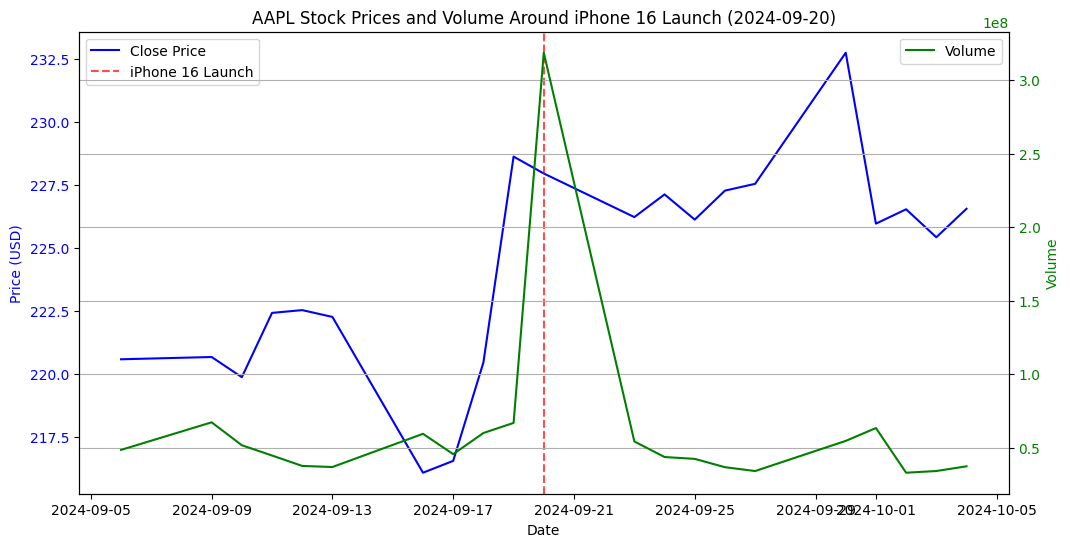

In [9]:
# Stock Price Analysis Around iPhone Launch

import pandas as pd
import matplotlib.pyplot as plt

# File paths for CSV files
stock_file_path = 'cleaned_database.csv'
launch_file_path = 'iphone_launch_datas.csv'

# Read stock data CSV file
stock_data = pd.read_csv(stock_file_path, parse_dates=['Date'])
stock_data.set_index('Date', inplace=True)

# Read iPhone launch data CSV file
launch_data = pd.read_csv(launch_file_path)

# Convert the 'Launch Date' column to datetime format
launch_data['Launch Date'] = pd.to_datetime(launch_data['Launch Date'])

# Variable for the selected iPhone (e.g., "iPhone 16")
selected_product = "iPhone 16"

# Select the launch date based on the chosen product
launch_focus = launch_data[launch_data['Product Name'] == selected_product]['Launch Date'].iloc[0]

# Define the range of two weeks before and after the launch
start_date = launch_focus - pd.Timedelta(weeks=2)
end_date = launch_focus + pd.Timedelta(weeks=2)

# Filter the stock data DataFrame for the desired interval
stock_data_focus = stock_data.loc[start_date:end_date]

# Create the figure and the primary axis for the closing price
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot closing prices on the primary axis
ax1.plot(stock_data_focus.index, stock_data_focus['Close'], label='Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the secondary axis for the volume
ax2 = ax1.twinx()
ax2.plot(stock_data_focus.index, stock_data_focus['Volume'], label='Volume', color='green')
ax2.set_ylabel('Volume', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add the vertical line for the iPhone launch
ax1.axvline(x=launch_focus, color='red', linestyle='--', alpha=0.7, label=f'{selected_product} Launch')

# Formatting
plt.title(f'AAPL Stock Prices and Volume Around {selected_product} Launch ({launch_focus.date()})')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.show()
